In [1]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=71d5c6344e08bf623b0769943fd3781f2910837f4aa2e935788d32cd946ee88a
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
!import utils
%matplotlib inline

/bin/bash: import: command not found


In [3]:
mv = pd.read_csv("movies_user-item.csv")

In [4]:
mv.head()

movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

In [5]:
rt = pd.read_csv("ratings_user-item.csv")

In [6]:
rt.head()

userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

In [7]:
mvrt = pd.merge(mv,rt)

In [67]:
mvrt.tail()

movieId              title  userId  rating
100831   193581  Cinderella (1950)     184     4.0
100832   193583  Cinderella (1950)     184     3.5
100833   193585  Cinderella (1950)     184     3.5
100834   193587  Cinderella (1950)     184     3.5
100835   193609  Cinderella (1950)     331     4.0

In [9]:
tg = pd.read_csv("tagsngenres.csv")

In [10]:
tg.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

               tags  
0             pixar  
1             pixar  
2               fun  
3           fantasy  
4  magic board game

In [80]:
mvrtg = pd.merge(pd.merge(mv,rt),tg)


In [12]:
mvrtg

movieId                           title  userId  rating  \
0             1                Toy Story (1995)       1     4.0   
1             1                Toy Story (1995)       1     4.0   
2             1                Toy Story (1995)       1     4.0   
3             1                Toy Story (1995)       5     4.0   
4             1                Toy Story (1995)       5     4.0   
...         ...                             ...     ...     ...   
196611   187595  Solo: A Star Wars Story (2018)     586     5.0   
196612   193565       Gintama: The Movie (2010)     184     3.5   
196613   193565       Gintama: The Movie (2010)     184     3.5   
196614   193565       Gintama: The Movie (2010)     184     3.5   
196615   193565       Gintama: The Movie (2010)     184     3.5   

                                             genres       tags  
0       Adventure|Animation|Children|Comedy|Fantasy      pixar  
1       Adventure|Animation|Children|Comedy|Fantasy      pixar  
2       Adventure|Animation|Children|Comedy|Fantasy        fun  
3       Adventure|Animation|Children|Comedy|Fantasy      pixar  
4       Adventure|Animation|Children|Comedy|Fantasy      pixar  
...                                             ...        ...  
196611             Action|Adventure|Children|Sci-Fi  star wars  
196612               Action|Animation|Comedy|Sci-Fi      anime  
196613               Action|Animation|Comedy|Sci-Fi     comedy  
196614               Action|Animation|Comedy|Sci-Fi    gintama  
196615               Action|Animation|Comedy|Sci-Fi   remaster  

[196616 rows x 6 columns]



```
# Inspecting merged Datasets

```



In [13]:
mvrt.describe()

movieId         userId         rating
count  100836.000000  100836.000000  100836.000000
mean    19435.295718     326.127564       3.501557
std     35530.987199     182.618491       1.042529
min         1.000000       1.000000       0.500000
25%      1199.000000     177.000000       3.000000
50%      2991.000000     325.000000       3.500000
75%      8122.000000     477.000000       4.000000
max    193609.000000     610.000000       5.000000

In [14]:
mvrtg.describe()

movieId         userId         rating
count  196616.000000  196616.000000  196616.000000
mean    12030.631164     308.529092       3.978651
std     28604.597946     178.103709       0.969032
min         1.000000       1.000000       0.500000
25%       296.000000     156.000000       3.500000
50%       924.000000     308.000000       4.000000
75%      4223.000000     456.000000       5.000000
max    193565.000000     610.000000       5.000000

In [15]:
mvrt.shape

(100836, 4)

In [17]:
mvrt.isnull()

movieId  title  userId  rating
0         False  False   False   False
1         False  False   False   False
2         False  False   False   False
3         False  False   False   False
4         False  False   False   False
...         ...    ...     ...     ...
100831    False  False   False   False
100832    False  False   False   False
100833    False  False   False   False
100834    False  False   False   False
100835    False  False   False   False

[100836 rows x 4 columns]

In [18]:
mvrt.isnull().sum().sort_values()

movieId    0
title      0
userId     0
rating     0
dtype: int64

In [19]:
mvrtg.isnull().sum().sort_values()

movieId    0
title      0
userId     0
rating     0
genres     0
tags       0
dtype: int64

In [20]:
mvrt.columns

Index(['movieId', 'title', 'userId', 'rating'], dtype='object')

In [21]:
mvrtg.columns

Index(['movieId', 'title', 'userId', 'rating', 'genres', 'tags'], dtype='object')

In [82]:
mvrtg.drop(mvrtg.iloc[:, 4:6], inplace=True, axis=1)
mvrtg.head()

movieId             title  userId  rating
0        1  Toy Story (1995)       1     4.0
1        1  Toy Story (1995)       1     4.0
2        1  Toy Story (1995)       1     4.0
3        1  Toy Story (1995)       5     4.0
4        1  Toy Story (1995)       5     4.0

In [83]:
mvrtg.shape

(196616, 4)

In [22]:
mvrt.userId.value_counts(ascending=True)

53       20
147      20
569      20
278      20
194      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: userId, Length: 610, dtype: int64

In [23]:
len(mvrt.userId.unique())

610

In [65]:
len(mvrt.rating)

100836

In [63]:
len(mvrt.title.unique())

190

In [69]:
mvrt.userId.unique()

array([  1,   5,   7,  15,  17,  18,  19,  21,  27,  31,  32,  33,  40,
        43,  44,  45,  46,  50,  54,  57,  63,  64,  66,  68,  71,  73,
        76,  78,  82,  86,  89,  90,  91,  93,  96,  98, 103, 107, 112,
       119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151,
       153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179,
       182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217,
       219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252,
       254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280,
       282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323,
       328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359,
       364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399,
       401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451,
       453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483,
       484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 52

In [25]:
mvrt.userId.duplicated().sum()

100226

In [26]:
mvrt["title"] = mvrtg["title"].str.strip()

In [27]:
mvrt

movieId              title  userId  rating
0             1   Toy Story (1995)       1     4.0
1             1   Toy Story (1995)       5     4.0
2             1   Toy Story (1995)       7     4.5
3             1   Toy Story (1995)      15     2.5
4             1   Toy Story (1995)      17     4.5
...         ...                ...     ...     ...
100831   193581  Cinderella (1950)     184     4.0
100832   193583  Cinderella (1950)     184     3.5
100833   193585  Cinderella (1950)     184     3.5
100834   193587  Cinderella (1950)     184     3.5
100835   193609  Cinderella (1950)     331     4.0

[100836 rows x 4 columns]

In [73]:
mvrt_list = mvrt.groupby(by = ["userId"])["rating"].apply(list).reset_index()

In [74]:
mvrt_list = mvrt_list["rating"].tolist()

In [75]:
mvrt_list[0:1]

[[4.0,
  4.0,
  4.0,
  5.0,
  5.0,
  3.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  3.0,
  5.0,
  4.0,
  5.0,
  3.0,
  3.0,
  5.0,
  4.0,
  4.0,
  5.0,
  4.0,
  3.0,
  4.0,
  5.0,
  4.0,
  3.0,
  5.0,
  4.0,
  4.0,
  5.0,
  4.0,
  4.0,
  4.0,
  5.0,
  5.0,
  3.0,
  5.0,
  3.0,
  4.0,
  3.0,
  3.0,
  4.0,
  5.0,
  5.0,
  5.0,
  4.0,
  5.0,
  3.0,
  5.0,
  5.0,
  5.0,
  5.0,
  3.0,
  5.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  4.0,
  5.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  4.0,
  5.0,
  5.0,
  4.0,
  2.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  3.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  5.0,
  4.0,
  5.0,
  3.0,
  5.0,
  5.0,
  4.0,
  5.0,
  3.0,
  3.0,
  5.0,
  4.0,
  4.0,
  5.0,
  4.0,
  4.0,
  5.0,
  5.0,
  4.0,
  4.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  3.0,
  5.0,
  4.0,
  4.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  4.0,
  5.0,
  4.0,
  4.0,

In [31]:
mvrt_list[0:2]

[['Toy Story (1995)',
  'Toy Story (1995)',
  'Toy Story (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Clueless (1995)',
  'Clueless (1995)',
  'Clueless (1995)',
  'Happy Gilmore (1996)',
  'Happy Gilmore (1996)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Apollo 13 (1995)',
  'Before Sunrise (1995)',
  'Clerks (1994)',
  'Clerks (1994)',
  'Forget Paris (1995)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A

In [32]:
mvrt_list

[['Toy Story (1995)',
  'Toy Story (1995)',
  'Toy Story (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
  'Clueless (1995)',
  'Clueless (1995)',
  'Clueless (1995)',
  'Happy Gilmore (1996)',
  'Happy Gilmore (1996)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Braveheart (1995)',
  'Apollo 13 (1995)',
  'Before Sunrise (1995)',
  'Clerks (1994)',
  'Clerks (1994)',
  'Forget Paris (1995)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Star Wars: Episode IV - A

In [33]:
from mlxtend.preprocessing import TransactionEncoder

In [34]:
transencoder = TransactionEncoder()
transactionencoder = transencoder.fit_transform(mvrt_list)

In [56]:
mvrt_df = pd.DataFrame(transactionencoder,columns=transencoder.columns_)


In [57]:
mvrt_df

2001: A Space Odyssey (1968)  Addams Family Values (1993)  \
0                           False                        False   
1                            True                         True   
2                           False                        False   
3                           False                        False   
4                           False                        False   
..                            ...                          ...   
605                         False                         True   
606                         False                        False   
607                         False                        False   
608                         False                        False   
609                          True                         True   

     Airheads (1994)  Aladdin (1992)  All About Eve (1950)  \
0              False           False                 False   
1              False           False                 False   
2              False           False                 False   
3              False           False                 False   
4              False           False                 False   
..               ...             ...                   ...   
605             True            True                 False   
606            False           False                 False   
607            False           False                 False   
608            False           False                 False   
609            False            True                 False   

     Anne Frank Remembered (1995)  Apollo 13 (1995)  \
0                           False              True   
1                           False              True   
2                           False             False   
3                           False              True   
4                           False              True   
..                            ...               ...   
605                         False              True   
606                         False              True   
607                         False              True   
608                         False              True   
609                         False              True   

     Around the World in 80 Days (1956)  Babe (1995)  Batman (1989)  ...  \
0                                 False        False          False  ...   
1                                 False        False          False  ...   
2                                 False        False          False  ...   
3                                 False         True          False  ...   
4                                 False        False          False  ...   
..                                  ...          ...            ...  ...   
605                               False         True           True  ...   
606                               False         True          False  ...   
607                               False         True          False  ...   
608                               False         True          False  ...   
609                               False         True           True  ...   

     Up Close and Personal (1996)  Vertigo (1958)  Virtuosity (1995)  \
0                           False           False              False   
1                           False           False              False   
2                           False           False              False   
3                           False           False              False   
4                           False           False              False   
..                            ...             ...                ...   
605                         False           False               True   
606                          True           False              False   
607                          True           False              False   
608                         False           False              False   
609                         False            True               True   

     Wallace & Gromit: A Clo

In [58]:
mvrt_df.describe()

2001: A Space Odyssey (1968) Addams Family Values (1993)  \
count                           610                         610   
unique                            2                           2   
top                           False                       False   
freq                            448                         454   

       Airheads (1994) Aladdin (1992) All About Eve (1950)  \
count              610            610                  610   
unique               2              2                    2   
top              False          False                False   
freq               585            537                  600   

       Anne Frank Remembered (1995) Apollo 13 (1995)  \
count                           610              610   
unique                            2                2   
top                           False             True   
freq                            605              383   

       Around the World in 80 Days (1956) Babe (1995) Batman (1989)  ...  \
count                                 610         610           610  ...   
unique                                  2           2             2  ...   
top                                 False       False         False  ...   
freq                                  601         384           499  ...   

       Up Close and Personal (1996) Vertigo (1958) Virtuosity (1995)  \
count                           610            610               610   
unique                            2              2                 2   
top                           False          False             False   
freq                            594            517               592   

       Wallace & Gromit: A Close Shave (1995)  \
count                                     610   
unique                                      2   
top                                     False   
freq                                      579   

       Wallace & Gromit: The Best of Aardman Animation (1996)  \
count                                                 610       
unique                                                  2       
top                                                 False       
freq                                                  591       

       Welcome to the Dollhouse (1995) What's Eating Gilbert Grape (1993)  \
count                              610                                610   
unique                               2                                  2   
top                              False                              False   
freq                               588                                539   

       What's Love Got to Do with It? (1993) When a Man Loves a Woman (1994)  \
count                                    610                             610   
unique                                     2                               2   
top                                    False                           False   
freq                                     593                             599   

       While You Were Sleeping (1995)  
count                             610  
unique                              2  
top                             False  
freq                              546  

[4 rows x 190 columns]



```
# generating the most frequent itemsets
```



In [92]:
from mlxtend.frequent_patterns import apriori
mvrt_freq = apriori(mvrt_df, min_support=0.6,use_colnames=True,max_len=3)

In [93]:
mvrt_freq

support                                           itemsets
0   0.627869                                 (Apollo 13 (1995))
1   0.795082                                (Braveheart (1995))
2   0.806557  (Léon: The Professional (a.k.a. The Profession...
3   0.865574                              (Pulp Fiction (1994))
4   0.919672        (Star Wars: Episode IV - A New Hope (1977))
5   0.760656        (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))
6   0.667213  (Braveheart (1995), Léon: The Professional (a....
7   0.663934           (Pulp Fiction (1994), Braveheart (1995))
8   0.760656  (Braveheart (1995), Star Wars: Episode IV - A ...
9   0.673770  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...
10  0.744262  (Pulp Fiction (1994), Léon: The Professional (...
11  0.767213  (Léon: The Professional (a.k.a. The Profession...
12  0.654098  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...
13  0.785246  (Pulp Fiction (1994), Star Wars: Episode IV - ...
14  0.634426  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...
15  0.736066  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), St...
16  0.608197  (Pulp Fiction (1994), Braveheart (1995), Léon:...
17  0.644262  (Léon: The Professional (a.k.a. The Profession...
18  0.629508  (Pulp Fiction (1994), Braveheart (1995), Star ...
19  0.657377  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...
20  0.704918  (Léon: The Professional (a.k.a. The Profession...
21  0.636066  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...
22  0.609836  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...



```
# Or
```



In [94]:
mvrt_freq['length'] = mvrt_freq['itemsets'].apply(lambda x: len(x))
mvrt_freq

support                                           itemsets  length
0   0.627869                                 (Apollo 13 (1995))       1
1   0.795082                                (Braveheart (1995))       1
2   0.806557  (Léon: The Professional (a.k.a. The Profession...       1
3   0.865574                              (Pulp Fiction (1994))       1
4   0.919672        (Star Wars: Episode IV - A New Hope (1977))       1
5   0.760656        (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))       1
6   0.667213  (Braveheart (1995), Léon: The Professional (a....       2
7   0.663934           (Pulp Fiction (1994), Braveheart (1995))       2
8   0.760656  (Braveheart (1995), Star Wars: Episode IV - A ...       2
9   0.673770  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...       2
10  0.744262  (Pulp Fiction (1994), Léon: The Professional (...       2
11  0.767213  (Léon: The Professional (a.k.a. The Profession...       2
12  0.654098  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...       2
13  0.785246  (Pulp Fiction (1994), Star Wars: Episode IV - ...       2
14  0.634426  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...       2
15  0.736066  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), St...       2
16  0.608197  (Pulp Fiction (1994), Braveheart (1995), Léon:...       3
17  0.644262  (Léon: The Professional (a.k.a. The Profession...       3
18  0.629508  (Pulp Fiction (1994), Braveheart (1995), Star ...       3
19  0.657377  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...       3
20  0.704918  (Léon: The Professional (a.k.a. The Profession...       3
21  0.636066  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...       3
22  0.609836  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...       3

In [95]:
mvrt_freq['itemsets'].apply(lambda x: len(x)).value_counts()

2    10
3     7
1     6
Name: itemsets, dtype: int64

**Association Rule Mining**

In [60]:
from mlxtend.frequent_patterns import association_rules
ass_rules = association_rules(mvrt_freq,metric="confidence",min_threshold=0.9)
ass_rules

antecedents  \
0                                 (Braveheart (1995))   
1   (Léon: The Professional (a.k.a. The Profession...   
2   (Léon: The Professional (a.k.a. The Profession...   
3                               (Pulp Fiction (1994))   
4         (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))   
5            (Pulp Fiction (1994), Braveheart (1995))   
6   (Léon: The Professional (a.k.a. The Profession...   
7   (Braveheart (1995), Léon: The Professional (a....   
8            (Pulp Fiction (1994), Braveheart (1995))   
9   (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...   
10  (Pulp Fiction (1994), Léon: The Professional (...   
11  (Star Wars: Episode IV - A New Hope (1977), Lé...   
12  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...   
13  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...   

                                          consequents  antecedent support  \
0         (Star Wars: Episode IV - A New Hope (1977))            0.795082   
1                               (Pulp Fiction (1994))            0.806557   
2         (Star Wars: Episode IV - A New Hope (1977))            0.806557   
3         (Star Wars: Episode IV - A New Hope (1977))            0.865574   
4         (Star Wars: Episode IV - A New Hope (1977))            0.760656   
5   (Léon: The Professional (a.k.a. The Profession...            0.663934   
6                               (Pulp Fiction (1994))            0.667213   
7         (Star Wars: Episode IV - A New Hope (1977))            0.667213   
8         (Star Wars: Episode IV - A New Hope (1977))            0.663934   
9         (Star Wars: Episode IV - A New Hope (1977))            0.673770   
10        (Star Wars: Episode IV - A New Hope (1977))            0.744262   
11                              (Pulp Fiction (1994))            0.767213   
12        (Star Wars: Episode IV - A New Hope (1977))            0.654098   
13        (Star Wars: Episode IV - A New Hope (1977))            0.634426   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.919672  0.760656    0.956701  1.040263  0.029441    1.855191  
1             0.865574  0.744262    0.922764  1.066072  0.046127    1.740466  
2             0.919672  0.767213    0.951220  1.034303  0.025445    1.646721  
3             0.919672  0.785246    0.907197  0.986435 -0.010798    0.865574  
4             0.919672  0.736066    0.967672  1.052193  0.036512    2.484809  
5             0.806557  0.608197    0.916049  1.135752  0.072696    2.304243  
6             0.865574  0.608197    0.911548  1.053114  0.030675    1.519763  
7             0.919672  0.644262    0.965602  1.049942  0.030645    2.335246  
8             0.919672  0.629508    0.948148  1.030963  0.018906    1.549180  
9             0.919672  0.657377    0.975669  1.060888  0.037729    3.301475  
10            0.919672  0.704918    0.947137  1.029863  0.020441    1.519536  
11            0.865574  0.704918    0.918803  1.061496  0.040838    1.655565  
12            0.919672  0.636066    0.972431  1.057367  0.034510    2.913711  
13            0.919672  0.609836    0.961240  1.045199  0.026372    2.072459

**Creating the Association Rules**

In [62]:
ass_rules1 = ass_rules[["antecedents","consequents","support","confidence","lift"]]
ass_rules1

antecedents  \
0                                 (Braveheart (1995))   
1   (Léon: The Professional (a.k.a. The Profession...   
2   (Léon: The Professional (a.k.a. The Profession...   
3                               (Pulp Fiction (1994))   
4         (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))   
5            (Pulp Fiction (1994), Braveheart (1995))   
6   (Léon: The Professional (a.k.a. The Profession...   
7   (Braveheart (1995), Léon: The Professional (a....   
8            (Pulp Fiction (1994), Braveheart (1995))   
9   (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...   
10  (Pulp Fiction (1994), Léon: The Professional (...   
11  (Star Wars: Episode IV - A New Hope (1977), Lé...   
12  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...   
13  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...   

                                          consequents   support  confidence  \
0         (Star Wars: Episode IV - A New Hope (1977))  0.760656    0.956701   
1                               (Pulp Fiction (1994))  0.744262    0.922764   
2         (Star Wars: Episode IV - A New Hope (1977))  0.767213    0.951220   
3         (Star Wars: Episode IV - A New Hope (1977))  0.785246    0.907197   
4         (Star Wars: Episode IV - A New Hope (1977))  0.736066    0.967672   
5   (Léon: The Professional (a.k.a. The Profession...  0.608197    0.916049   
6                               (Pulp Fiction (1994))  0.608197    0.911548   
7         (Star Wars: Episode IV - A New Hope (1977))  0.644262    0.965602   
8         (Star Wars: Episode IV - A New Hope (1977))  0.629508    0.948148   
9         (Star Wars: Episode IV - A New Hope (1977))  0.657377    0.975669   
10        (Star Wars: Episode IV - A New Hope (1977))  0.704918    0.947137   
11                              (Pulp Fiction (1994))  0.704918    0.918803   
12        (Star Wars: Episode IV - A New Hope (1977))  0.636066    0.972431   
13        (Star Wars: Episode IV - A New Hope (1977))  0.609836    0.961240   

        lift  
0   1.040263  
1   1.066072  
2   1.034303  
3   0.986435  
4   1.052193  
5   1.135752  
6   1.053114  
7   1.049942  
8   1.030963  
9   1.060888  
10  1.029863  
11  1.061496  
12  1.057367  
13  1.045199

In [42]:
ass_rules2 = ass_rules1[ass_rules1["support"]>0.70]
ass_rules2

antecedents  \
0                                 (Braveheart (1995))   
1   (Léon: The Professional (a.k.a. The Profession...   
2   (Léon: The Professional (a.k.a. The Profession...   
3                               (Pulp Fiction (1994))   
4         (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))   
10  (Pulp Fiction (1994), Léon: The Professional (...   
11  (Star Wars: Episode IV - A New Hope (1977), Lé...   

                                    consequents   support  confidence  \
0   (Star Wars: Episode IV - A New Hope (1977))  0.760656    0.956701   
1                         (Pulp Fiction (1994))  0.744262    0.922764   
2   (Star Wars: Episode IV - A New Hope (1977))  0.767213    0.951220   
3   (Star Wars: Episode IV - A New Hope (1977))  0.785246    0.907197   
4   (Star Wars: Episode IV - A New Hope (1977))  0.736066    0.967672   
10  (Star Wars: Episode IV - A New Hope (1977))  0.704918    0.947137   
11                        (Pulp Fiction (1994))  0.704918    0.918803   

        lift  
0   1.040263  
1   1.066072  
2   1.034303  
3   0.986435  
4   1.052193  
10  1.029863  
11  1.061496

In [43]:
ass_rules3 = ass_rules1[ass_rules1["confidence"]>0.97]
ass_rules3

antecedents  \
9   (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...   
12  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...   

                                    consequents   support  confidence  \
9   (Star Wars: Episode IV - A New Hope (1977))  0.657377    0.975669   
12  (Star Wars: Episode IV - A New Hope (1977))  0.636066    0.972431   

        lift  
9   1.060888  
12  1.057367

In [44]:
ass_rules4 = ass_rules1[ass_rules1["confidence"]>0.90]
ass_rules4

antecedents  \
0                                 (Braveheart (1995))   
1   (Léon: The Professional (a.k.a. The Profession...   
2   (Léon: The Professional (a.k.a. The Profession...   
3                               (Pulp Fiction (1994))   
4         (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))   
5            (Pulp Fiction (1994), Braveheart (1995))   
6   (Léon: The Professional (a.k.a. The Profession...   
7   (Braveheart (1995), Léon: The Professional (a....   
8            (Pulp Fiction (1994), Braveheart (1995))   
9   (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...   
10  (Pulp Fiction (1994), Léon: The Professional (...   
11  (Star Wars: Episode IV - A New Hope (1977), Lé...   
12  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...   
13  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...   

                                          consequents   support  confidence  \
0         (Star Wars: Episode IV - A New Hope (1977))  0.760656    0.956701   
1                               (Pulp Fiction (1994))  0.744262    0.922764   
2         (Star Wars: Episode IV - A New Hope (1977))  0.767213    0.951220   
3         (Star Wars: Episode IV - A New Hope (1977))  0.785246    0.907197   
4         (Star Wars: Episode IV - A New Hope (1977))  0.736066    0.967672   
5   (Léon: The Professional (a.k.a. The Profession...  0.608197    0.916049   
6                               (Pulp Fiction (1994))  0.608197    0.911548   
7         (Star Wars: Episode IV - A New Hope (1977))  0.644262    0.965602   
8         (Star Wars: Episode IV - A New Hope (1977))  0.629508    0.948148   
9         (Star Wars: Episode IV - A New Hope (1977))  0.657377    0.975669   
10        (Star Wars: Episode IV - A New Hope (1977))  0.704918    0.947137   
11                              (Pulp Fiction (1994))  0.704918    0.918803   
12        (Star Wars: Episode IV - A New Hope (1977))  0.636066    0.972431   
13        (Star Wars: Episode IV - A New Hope (1977))  0.609836    0.961240   

        lift  
0   1.040263  
1   1.066072  
2   1.034303  
3   0.986435  
4   1.052193  
5   1.135752  
6   1.053114  
7   1.049942  
8   1.030963  
9   1.060888  
10  1.029863  
11  1.061496  
12  1.057367  
13  1.045199

In [45]:
ass_rules5 = ass_rules1[ass_rules1["lift"]>1]
ass_rules5

antecedents  \
0                                 (Braveheart (1995))   
1   (Léon: The Professional (a.k.a. The Profession...   
2   (Léon: The Professional (a.k.a. The Profession...   
4         (Twelve Monkeys (a.k.a. 12 Monkeys) (1995))   
5            (Pulp Fiction (1994), Braveheart (1995))   
6   (Léon: The Professional (a.k.a. The Profession...   
7   (Braveheart (1995), Léon: The Professional (a....   
8            (Pulp Fiction (1994), Braveheart (1995))   
9   (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Br...   
10  (Pulp Fiction (1994), Léon: The Professional (...   
11  (Star Wars: Episode IV - A New Hope (1977), Lé...   
12  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Lé...   
13  (Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Pu...   

                                          consequents   support  confidence  \
0         (Star Wars: Episode IV - A New Hope (1977))  0.760656    0.956701   
1                               (Pulp Fiction (1994))  0.744262    0.922764   
2         (Star Wars: Episode IV - A New Hope (1977))  0.767213    0.951220   
4         (Star Wars: Episode IV - A New Hope (1977))  0.736066    0.967672   
5   (Léon: The Professional (a.k.a. The Profession...  0.608197    0.916049   
6                               (Pulp Fiction (1994))  0.608197    0.911548   
7         (Star Wars: Episode IV - A New Hope (1977))  0.644262    0.965602   
8         (Star Wars: Episode IV - A New Hope (1977))  0.629508    0.948148   
9         (Star Wars: Episode IV - A New Hope (1977))  0.657377    0.975669   
10        (Star Wars: Episode IV - A New Hope (1977))  0.704918    0.947137   
11                              (Pulp Fiction (1994))  0.704918    0.918803   
12        (Star Wars: Episode IV - A New Hope (1977))  0.636066    0.972431   
13        (Star Wars: Episode IV - A New Hope (1977))  0.609836    0.961240   

        lift  
0   1.040263  
1   1.066072  
2   1.034303  
4   1.052193  
5   1.135752  
6   1.053114  
7   1.049942  
8   1.030963  
9   1.060888  
10  1.029863  
11  1.061496  
12  1.057367  
13  1.045199

In [46]:
import plotly.express as px


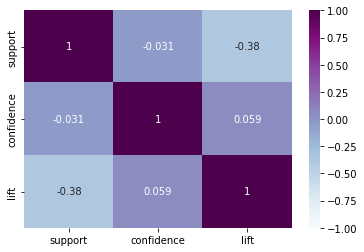

In [47]:
import seaborn as sns
sns.heatmap(data=ass_rules1.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,
           cmap='BuPu');

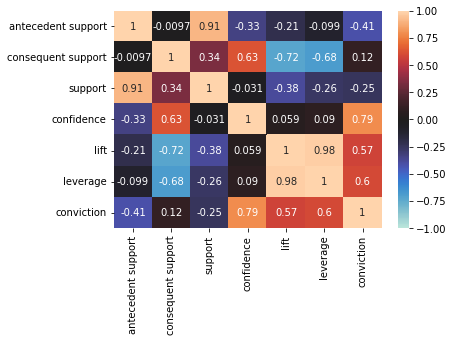

In [48]:
import seaborn as sns
sns.heatmap(data=ass_rules.corr(method='spearman'),
           annot=True,
           vmin=-1,
           vmax=1,
           center=0,);

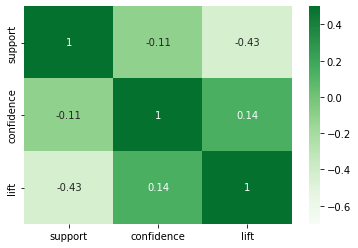

In [49]:
import seaborn as sns
sns.heatmap(data=ass_rules2.corr(method='spearman'),
           annot=True,
           vmin=-0.7,
           vmax=0.5,
           center=0,
            cmap="Greens");

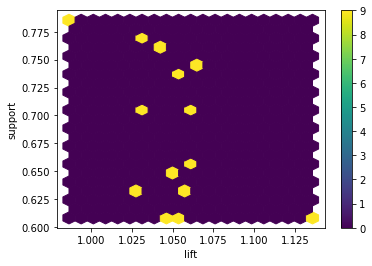

In [50]:
ass_rules.plot.hexbin(x='lift',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);

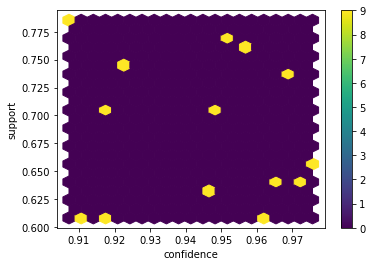

In [51]:
ass_rules.plot.hexbin(x='confidence',y='support',cmap='viridis',gridsize=20,sharex=False,bins=10);



```
# An increasing value of lift is relatively associated with the 
increase of other measures such as confidence
```



In [97]:
ass_rules[ass_rules["antecedents"].apply(lambda x: "Star Wars: Episode IV - A New Hope (1977)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents                                        consequents                    
(Star Wars: Episode IV - A New Hope (1977), Léo... (Pulp Fiction (1994))  1.061496

In [98]:
ass_rules[ass_rules["antecedents"].apply(lambda x: "Braveheart (1995)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['lift']].max().sort_values(ascending=False,by='lift').head(10)

lift
antecedents                                        consequents                                                 
(Pulp Fiction (1994), Braveheart (1995))           (Léon: The Professional (a.k.a. The Professiona...  1.135752
(Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Bra... (Star Wars: Episode IV - A New Hope (1977))         1.060888
(Léon: The Professional (a.k.a. The Professiona... (Pulp Fiction (1994))                               1.053114
                                                   (Star Wars: Episode IV - A New Hope (1977))         1.049942
(Braveheart (1995))                                (Star Wars: Episode IV - A New Hope (1977))         1.040263
(Pulp Fiction (1994), Braveheart (1995))           (Star Wars: Episode IV - A New Hope (1977))         1.030963